In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
data = pd.read_csv(r'C:\Users\hp\Desktop\Praxis\1st Trimester\titanic_train.csv')

In [190]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

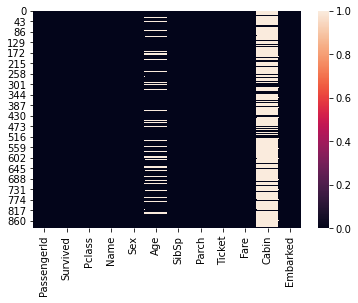

In [191]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

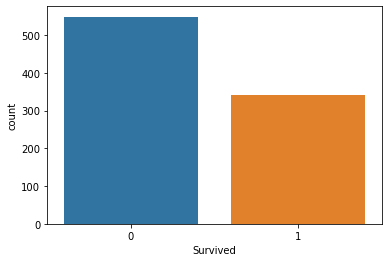

In [192]:
sns.countplot(x = 'Survived', data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

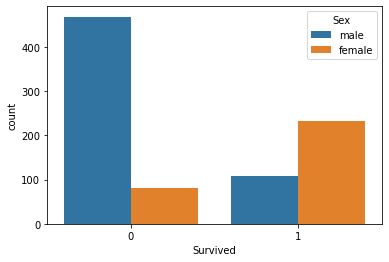

In [193]:
sns.countplot(x = 'Survived', hue = 'Sex', data= data)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

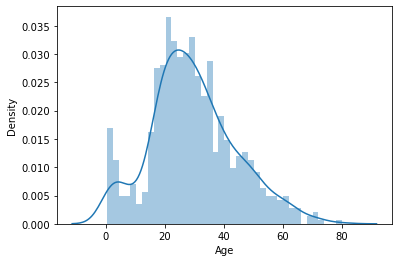

In [194]:
sns.distplot(data.Age.dropna(),bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

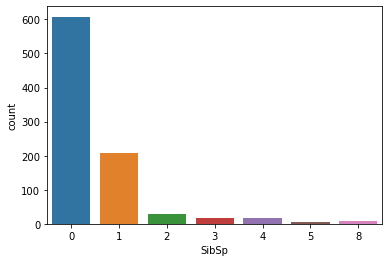

In [195]:
sns.countplot(x = 'SibSp', data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

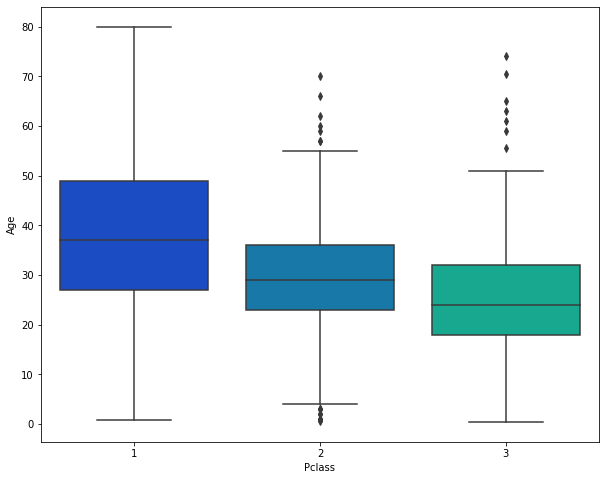

In [196]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Pclass',y='Age',data=data,palette = 'winter')

In [197]:
Embarked = pd.get_dummies(data['Embarked'],drop_first = True)
sex = pd.get_dummies(data['Sex'],drop_first = True)

In [198]:
data.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis = 1,inplace=True)

In [199]:
data = pd.concat([data,sex,Embarked],axis=1)

In [200]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [201]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [202]:
(data.isnull().sum()/len(data))*100

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Fare            0.00000
male            0.00000
Q               0.00000
S               0.00000
dtype: float64

In [203]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [204]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [205]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [206]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size = 0.3,random_state = 0)

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
classifier = DecisionTreeClassifier()

In [217]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [218]:
y_pred = classifier.predict(X_test)

In [222]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [223]:
cm = confusion_matrix(y_test,y_pred)

In [224]:
print(cm)

[[140  28]
 [ 35  65]]


In [225]:
accuracy = accuracy_score(y_test, y_pred)

In [226]:
print(accuracy)

0.7649253731343284
